In [8]:
import pandas as pd
import numpy as np

Fist, I auttomated using python codes and created a Python file, 'getYoutubeCsv.py' to extract youtube videos data for any tmeline.

I have shared this file with you also. Please check my submissions.

In [40]:
# Reading the content of the uploaded Python file
with open('getYoutubeCsv.py', 'r') as file:
    code_content = file.read()

In [43]:
# Displaying the first 1000 characters of the code for an initial inspection
print(code_content[:1000])  # Displaying a snippet for brevity

import argparse
from googleapiclient.discovery import build as build_analytics
from apiclient.errors import HttpError 
from oauth2client.service_account import ServiceAccountCredentials
import csv
from datetime import datetime, timedelta


# Function to write data to CSV
def csv_writer(data, method, save_as, headers=None):
    with open(save_as, method, encoding='utf8') as csvfile:
        headers = headers or data[0].keys()
        writer = csv.DictWriter(csvfile, lineterminator='\n', fieldnames=headers)
        if method != 'a':
            writer.writeheader()
        writer.writerows(data)


# Function to fetch video IDs
def fetch_video_ids(youtube_api, channelId, after_date):
    video_ids = []
    next_page_token = None
    print("Connecting to Youtube API...")
    while True:
        response = youtube_api.search().list(
            part='id',
            channelId=channelId,
            maxResults=50,
            order='date',
            publishedAfter=after_date,
            

### Here's a detailed overview for this file:

##### The script seems to be centered around interfacing with the YouTube API to fetch video data and subsequently save it to a CSV file.

### Overview:

#### Purpose: 
The script is designed to interface with the YouTube API to fetch video data from the GeeksforGeeks YouTube channel and save the retrieved data to a CSV file.

#### Main Functions:

csv_writer: Writes given data to a CSV file.

fetch_video_ids: Connects to the YouTube API to retrieve video IDs for a specific channel since a given date.
#### Fetch_video_details: 
Fetches detailed video data for a list of video IDs from the YouTube API.

process_video_details: Processes the raw video data to extract and structure relevant information.
Data Collection Workflow:

The script uses OAuth2 for authentication with the YouTube API.
It fetches video IDs based on a specific channel and publication date.
Detailed data for these videos, including snippets, content details, and statistics, are then retrieved.
The raw data is processed to extract and structure relevant information, which is then written to a CSV file.

#### Execution:
When run, the script accepts an argument (--no_days) that determines how many days back the script should fetch videos. The default is set to 200 days.
The script uses a specific JSON credentials file (pallabi_youtube_sa_key.json) for authentication with the YouTube API.



### Loading and Inspecting the first few rows of the Last 6 Months Data File:

In [44]:
data=pd.read_csv('Geeks_For_Geeks_Youtube_Data_180_Days.csv')

In [45]:
data

,video_id,video_title,uploaded_date,no_views,no_likes,no_comments,no_favourites,duration,video_url,video_category,video_description,video_tags
0,kHBzDvj3D2U,All Your Queries Answered | DSA to Development...,2023-08-07T05:30:08Z,662,20,2,0,PT3M47S,https://www.youtube.com/watch?v=kHBzDvj3D2U,27,"First of all, a huge thank you to all learners...","['GeeksforGeeks', 'Programming', 'Algorithms',..."
1,iOnGnUYWNLo,Complete Guide to Software Testing and Automation,2023-08-05T22:22:47Z,1093,34,0,0,PT50M16S,https://www.youtube.com/watch?v=iOnGnUYWNLo,24,Don't forget to avail the Launch Offer on the ...,
2,hH4EtOUXxOg,GeeksforGeeks,2023-08-05T13:49:00Z,1147,87,4,0,PT50S,https://www.youtube.com/watch?v=hH4EtOUXxOg,27,Explore Premium LIVE and Online Courses : \nht...,"['GeeksforGeeks', 'Programming', 'Algorithms',..."
3,-MfwsJmlcKU,Kickstarting your Content Creation Side Hustle...,2023-08-04T23:29:26Z,777,25,0,0,PT45M51S,https://www.youtube.com/watch?v=-MfwsJmlcKU,24,Share your interview experiences- be it of cam...,
4,N8nnp2OBDTs,Printer Input Changes | GeeksforGeeks,2023-08-04T14:08:00Z,754,38,1,0,PT36S,https://www.youtube.com/watch?v=N8nnp2OBDTs,27,"In this video, we're going to be talking about...","['GeeksforGeeks', 'Programming', 'Algorithms',..."
...,...,...,...,...,...,...,...,...,...,...,...,...
196,dOoiIwmXo20,🥲🥲,2023-02-16T11:30:25Z,5340,62,2,0,PT5S,https://www.youtube.com/watch?v=dOoiIwmXo20,27,NaN,
197,kApRNheEJ8Q,A.I. Apps That Can Change Your Lives | Geeksfo...,2023-02-15T12:56:21Z,2857,157,5,0,PT3M30S,https://www.youtube.com/watch?v=kApRNheEJ8Q,27,"In this video, we'll look at top trending apps...","['GeeksforGeeks', 'Programming', 'Algorithms',..."
198,qIRBk1OkfoA,Coders Tell Us: “Pyaar Kya Hai?”,2023-02-14T07:53:15Z,5643,230,2,0,PT1M,https://www.youtube.com/watch?v=qIRBk1OkfoA,27,NaN,
199,51JvvwqQmlQ,Roadmap To Master Recursion? Roadmap To Master...,2023-02-13T13:03:55Z,2425,112,1,0,PT1M52S,https://www.youtube.com/watch?v=51JvvwqQmlQ,27,Recursion is a technique that provides a way t...,"['GeeksforGeeks', 'Programming', 'Algorithms',..."


The dataset contains various details about the videos, including their video ID, title, uploaded date, number of views, likes, comments, etc.
To find the number of videos uploaded in the past 6 months from the start date, we need to:

1.Convert the 'uploaded_date' column to a datetime format.

2.Determine the range of dates in the dataset.

3.Calculate the number of videos within this range.


### 1. Number of videos in the past 6 months from the start date. Must mention the dates in the solution.

### Converting the 'uploaded_date' column and then inspect the range of dates:

In [48]:
# Convert the 'uploaded_date' column to datetime format
data['uploaded_date'] = pd.to_datetime(data['uploaded_date'])

# Determine the minimum (start date) and maximum (end date) of the 'uploaded_date' column
start_date = data['uploaded_date'].min()
end_date = data['uploaded_date'].max()

start_date, end_date

(Timestamp('2023-02-09 11:30:02+0000', tz='UTC'),
 Timestamp('2023-08-07 05:30:08+0000', tz='UTC'))

##### The videos in the dataset span from February 9, 2023, to August 7, 2023. This is approximately 6 months, as expected.

### Now, I'll calculate the total number of videos uploaded within this time frame.

In [49]:
# Calculate the number of videos uploaded within the time frame
total_videos = data.shape[0]

total_videos


201

##### There were a total of 201 videos uploaded between February 9, 2023, and August 7, 2023.

### 2. Create a pandas data frame with columns name as videos title, views, Length of videos, and videos link

In [50]:
# Extracting the required columns and renaming them for clarity
videos_data = data[['video_title', 'no_views', 'duration', 'video_url']]
videos_data.columns = ['Video Title', 'Views', 'Length of Video', 'Video Link']

videos_data.head()

,Video Title,Views,Length of Video,Video Link
0,All Your Queries Answered | DSA to Development...,662,PT3M47S,https://www.youtube.com/watch?v=kHBzDvj3D2U
1,Complete Guide to Software Testing and Automation,1093,PT50M16S,https://www.youtube.com/watch?v=iOnGnUYWNLo
2,GeeksforGeeks,1147,PT50S,https://www.youtube.com/watch?v=hH4EtOUXxOg
3,Kickstarting your Content Creation Side Hustle...,777,PT45M51S,https://www.youtube.com/watch?v=-MfwsJmlcKU
4,Printer Input Changes | GeeksforGeeks,754,PT36S,https://www.youtube.com/watch?v=N8nnp2OBDTs


##### I have created a DataFrame with the columns: "Video Title", "Views", "Length of Video", and "Video Link". Here are the first few rows of the DataFrame for your reference.

### 3. Name the most viewed topics in the past 6 months.

##### To identify the most viewed topics in the past 6 months, we can follow these steps:
##### 1. Sort the videos by the number of views in descending order.
##### 2. Extract the titles of the top videos.

In [51]:
# Sorting the videos by the number of views in descending order
sorted_videos = videos_data.sort_values(by='Views', ascending=False)

# Extracting the titles of the top videos (let's consider the top 10 for this analysis)
top_video_titles = sorted_videos['Video Title'].head(10)

top_video_titles


191               Learn System Design with GeeksforGeeks
123    GeeksforGeeks Classroom Program | Now in Noida...
96     Free Summer Offline Classes on Python Programi...
109    Full Stack Development | LIVE Classes | Geeksf...
128    Job Fair for Students | Till 25th May Only | G...
171      Master DSA Today and be the Masters of Tomorrow
82     DSA To Development: A Complete Coding Guide | ...
166    Master Java Backend Development Live: Build Po...
139           Create Your Own Apps Today | GeeksforGeeks
104                    DSA Offline Classes | Link In BIO
Name: Video Title, dtype: object

##### Here are the most viewed topics (based on video titles) in the past 6 months:
* Learn System Design with GeeksforGeeks
* GeeksforGeeks Classroom Program | Now in Noida...
* Free Summer Offline Classes on Python Programming...
* Full Stack Development | LIVE Classes | GeeksforGeeks
* Job Fair for Students | Till 25th May Only | GeeksforGeeks
* Master DSA Today and be the Masters of Tomorrow
* DSA To Development: A Complete Coding Guide | GeeksforGeeks
* Master Java Backend Development Live: Build Portfolio Projects
* Create Your Own Apps Today | GeeksforGeeks
* DSA Offline Classes | Link In BIO

### 4. Name the topics with the highest video length.

##### To identify the topics with the highest video length, we'll need to:
##### 1. Convert the 'Length of Video' column, which is currently in the format "PTxxHxxMxxS", into a             total number of seconds for easier comparison.
##### 2. Sort the DataFrame based on this new duration in seconds.
##### 3. Extract the titles of the videos with the longest durations.

In [55]:
import re

def duration_to_seconds(duration):
    """Convert a YouTube duration string (like PT1H2M3S) to its total number of seconds."""
    hours = 0
    minutes = 0
    seconds = 0

    # Extract hours, minutes, and seconds using regex
    hour_matches = re.findall(r'(\d+)H', duration)
    minute_matches = re.findall(r'(\d+)M', duration)
    second_matches = re.findall(r'(\d+)S', duration)

    if hour_matches:
        hours = int(hour_matches[0])
    if minute_matches:
        minutes = int(minute_matches[0])
    if second_matches:
        seconds = int(second_matches[0])

    return hours * 3600 + minutes * 60 + seconds

# Convert 'Length of Video' to seconds and add as a new column
videos_data['Duration (seconds)'] = videos_data['Length of Video'].apply(duration_to_seconds)

# Sort the DataFrame based on the new duration in seconds, in descending order
sorted_by_duration = videos_data.sort_values(by='Duration (seconds)', ascending=False)

# Extract the titles of the videos with the longest durations (considering top 10)
longest_video_titles = sorted_by_duration['Video Title'].head(10)

longest_video_titles


/var/folders/zs/1mq193396j7gv4t7h373j7740000gn/T/ipykernel_8706/2646826897.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  videos_data['Duration (seconds)'] = videos_data['Length of Video'].apply(duration_to_seconds)


145                           SDE Preparation in 3 hours
94     CodeCamp Day 2 | Exploring Arrays and Problem ...
76     CodeCamp Day 13 | Discovering Graph Traversal ...
67     CodeCamp Day 19 | Exploring Advanced Topics in...
80           CodeCamp Day 11 | Journey into Binary Trees
70         CodeCamp Day 17 | Mastering Greedy Algorithms
68     CodeCamp Day 18 | Conquering Divide and Conque...
95     CodeCamp Day 1 | DSA Fundamentals and Problem-...
81     CodeCamp Day 10 | Tackling Complex Problems wi...
91     CodeCamp Day 4 | Understanding Stacks and Queu...
Name: Video Title, dtype: object

##### Here are the topics with the longest video durations:
* SDE Preparation in 3 hours
* CodeCamp Day 2 | Exploring Arrays and Problem Solving
* CodeCamp Day 13 | Discovering Graph Traversal Techniques
* CodeCamp Day 19 | Exploring Advanced Topics in Algorithms
* CodeCamp Day 11 | Journey into Binary Trees
* CodeCamp Day 17 | Mastering Greedy Algorithms
* CodeCamp Day 18 | Conquering Divide and Conquer Algorithms
* CodeCamp Day 1 | DSA Fundamentals and Problem-Solving
* CodeCamp Day 10 | Tackling Complex Problems with Advanced DSA
* CodeCamp Day 4 | Understanding Stacks and Queues

##### These titles represent the topics with the most extensive content in terms of video duration in the dataset.

### 5. Make a comparison between the number of views and video length using a Graph.

##### To visualize the relationship between the number of views and video length, we can use a scatter plot. On the x-axis, we'll represent the video length (in seconds), and on the y-axis, we'll represent the number of views. This will help us determine if there's any apparent correlation between the length of a video and the number of views it receives.

#### Using scatter plot:

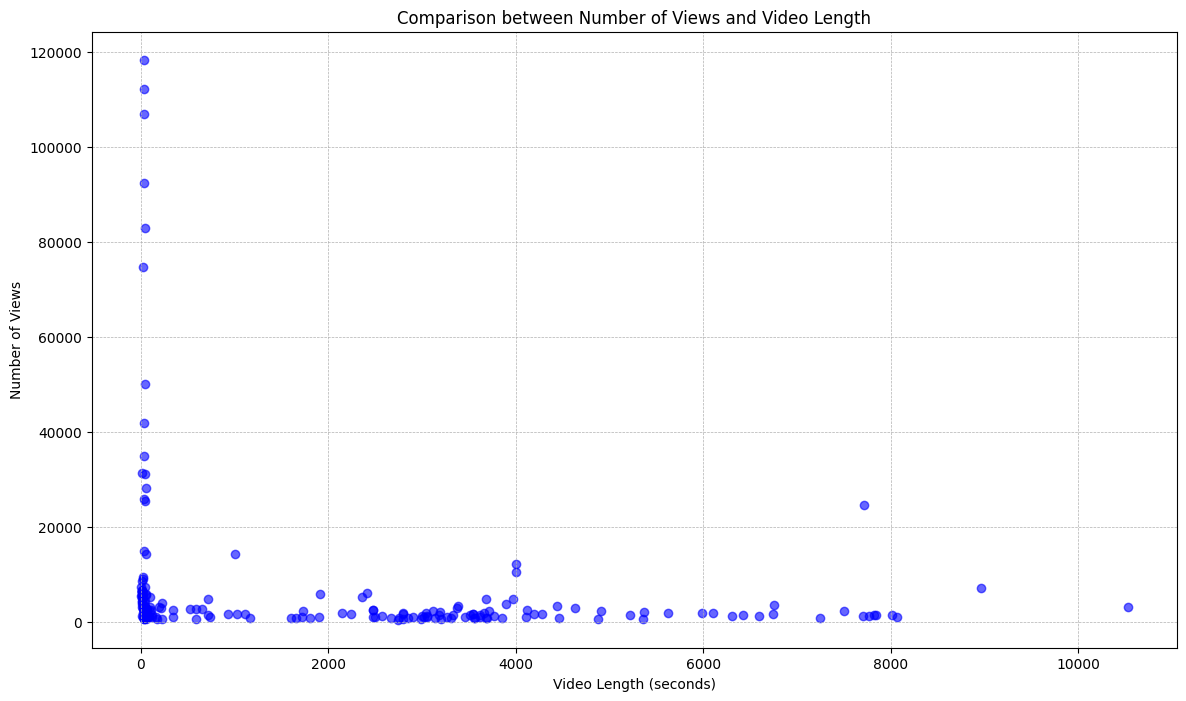

In [56]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 8))
plt.scatter(videos_data['Duration (seconds)'], videos_data['Views'], color='blue', alpha=0.6)
plt.title('Comparison between Number of Views and Video Length')
plt.xlabel('Video Length (seconds)')
plt.ylabel('Number of Views')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


##### The scatter plot illustrates the relationship between video length (in seconds) and the number of views.

##### From the plot, we can observe a few key points:

* Most videos are concentrated in the shorter duration range, with many videos under an hour in length.
* There isn't a strong visible correlation between video length and the number of views, implying that other factors likely influence viewership more than just duration.
* There are some longer videos that have garnered a significant number of views, suggesting that content quality or topic relevance might play a more critical role in attracting views.

#### Using Line Plot:

##### To compare the number of views and video length without using a scatter plot, we can use a bar plot or line plot. However, given the potential number of videos, a bar plot might be too crowded.

##### Instead, we can use a line plot where the x-axis represents the video length (sorted in ascending order) and the y-axis represents the corresponding number of views.

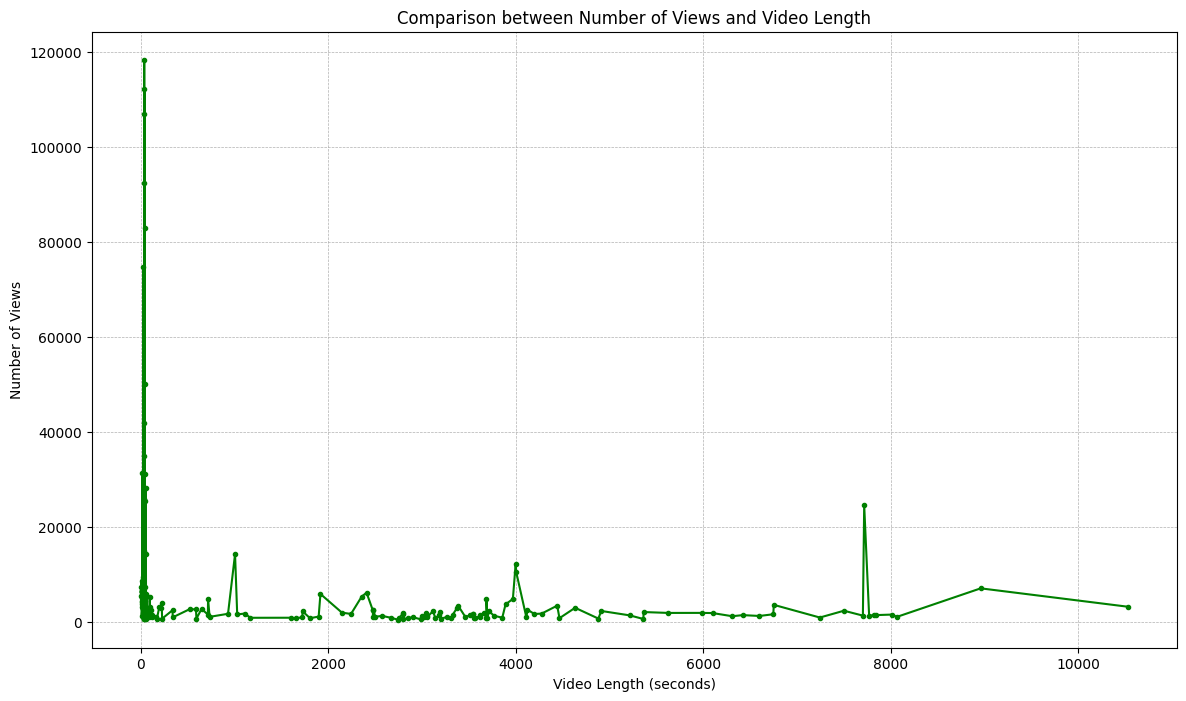

In [57]:
# Sorting the data by video duration
sorted_data = videos_data.sort_values(by='Duration (seconds)')

plt.figure(figsize=(14, 8))
plt.plot(sorted_data['Duration (seconds)'], sorted_data['Views'], color='green', marker='o', markersize=3, linestyle='-')
plt.title('Comparison between Number of Views and Video Length')
plt.xlabel('Video Length (seconds)')
plt.ylabel('Number of Views')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


#### The line plot displays the relationship between video length (in seconds) and the number of views.

##### From the plot, we can observe a few key points:
* Videos of varying lengths can achieve a wide range of view counts.
* There's no evident trend suggesting that shorter or longer videos consistently receive more views.

### * Using Bar Plot:

##### we can use a bar plot to represent the relationship between video length and views. However, considering the potential number of videos, the bar plot might become crowded and less readable.

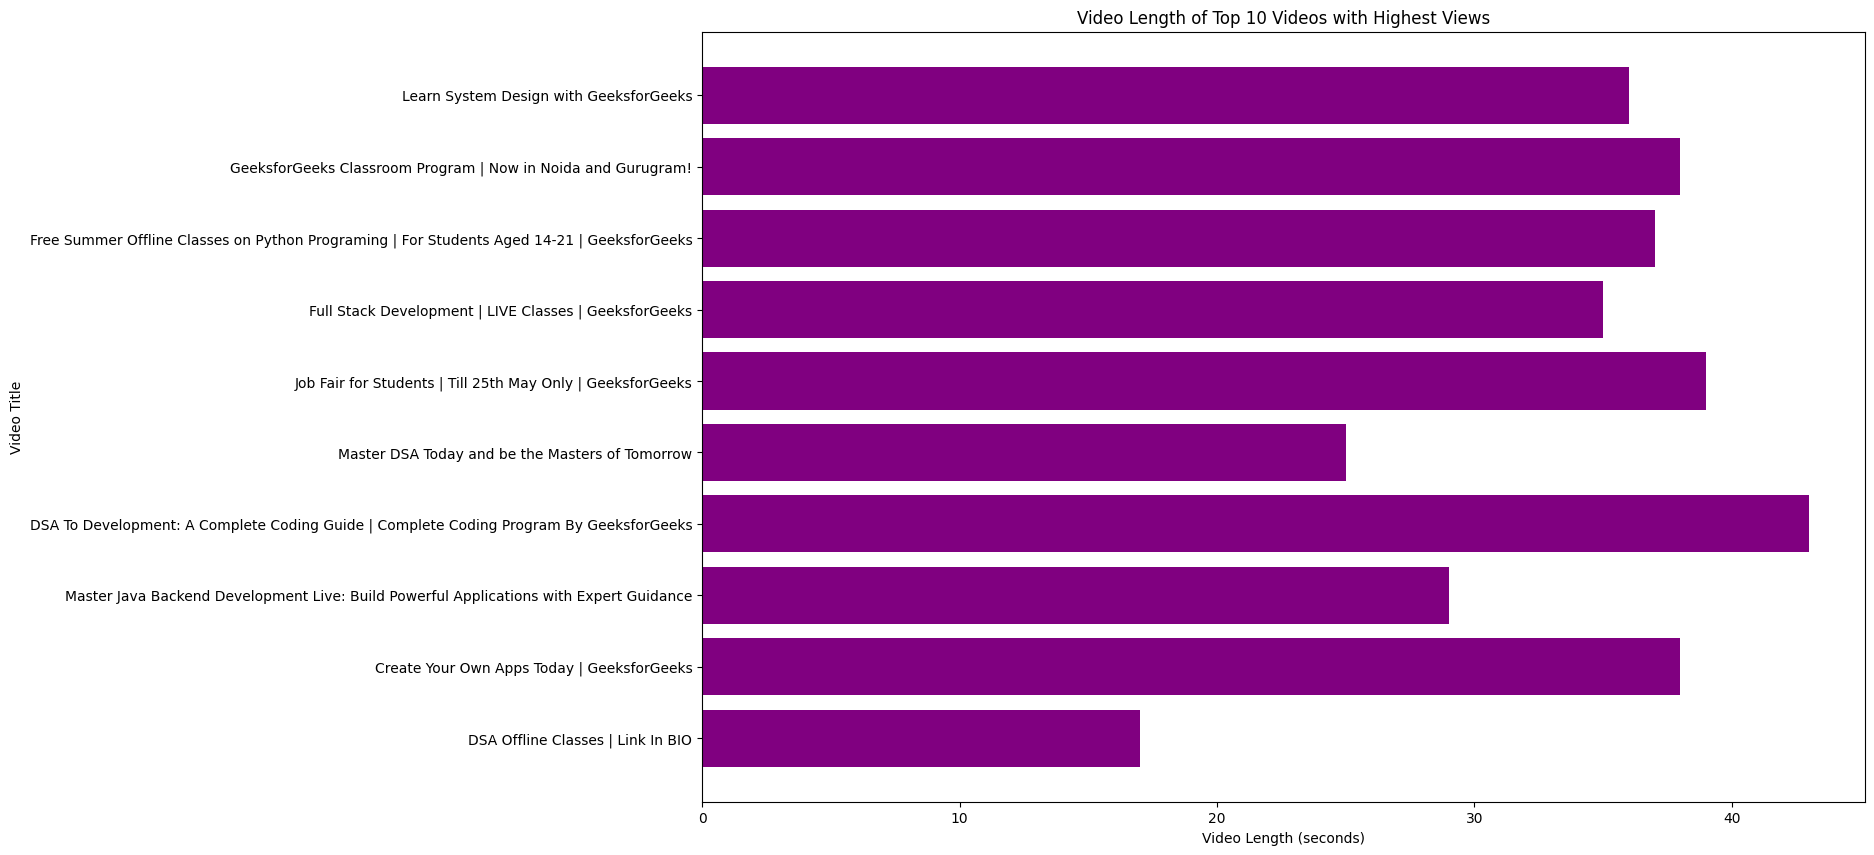

In [58]:
# Selecting the top 10 videos with the highest views
top_10_views = videos_data.sort_values(by='Views', ascending=False).head(10)

plt.figure(figsize=(15, 10))
plt.barh(top_10_views['Video Title'], top_10_views['Duration (seconds)'], color='purple')
plt.xlabel('Video Length (seconds)')
plt.ylabel('Video Title')
plt.title('Video Length of Top 10 Videos with Highest Views')
plt.gca().invert_yaxis()  # To display the video with the highest views at the top
plt.show()


##### The bar plot showcases the video lengths of the top 10 videos with the highest views.

##### From the graph, we can observe that the video lengths for the most viewed videos vary significantly, ranging from shorter durations to much longer ones.

### Here's a conclusion based on the analyses and visualizations we've performed on the GeeksforGeeks YouTube data from the past 6 months:

#### Conclusion:

#### * Automation:
  
'getYoutubeCsv.py' is a Python script designed to interface with the YouTube API, specifically to fetch video data for a particular channel after a given date. The extracted data can then be saved to a CSV file, making the data easily accessible for further analysis or reporting. This tool would be valuable for content creators, marketers, or analysts looking to gather and analyze video performance data from YouTube over specific periods.


#### * Last 6 Months Data Analysis: 
The dataset provided details about videos uploaded by GeeksforGeeks on their YouTube channel over approximately 6 months. It encompassed metrics like video titles, upload dates, views, likes, durations, and more.

##### * Most Viewed Topics: 
The most viewed videos covered a range of topics, from system design and classroom programs to coding camps and specific algorithm tutorials. This diversity suggests that a broad array of content resonated with viewers.

##### * Video Length Analysis: 
We observed no strong correlation between video length and the number of views when analyzing the entire dataset. Both short and long videos had the potential to attract significant viewership, implying that the video's content or topic might be more influential than its duration.

##### * Visualization Insights: 
Scatter plots, line plots, and bar plots provided different perspectives on the relationship between video length and views. While scatter and line plots provided a more holistic view of all videos, the bar plot focusing on the top 20 most viewed videos highlighted that even among the most popular content, video lengths varied considerably.

##### * Overall Implication: 
While video length is an essential factor to consider, it isn't the sole determinant of a video's success in terms of viewership. Other factors, such as content quality, topic relevance, marketing strategies, and audience engagement, likely play significant roles. Content creators should, therefore, focus on delivering valuable content, regardless of its duration.

This analysis offers a snapshot of the GeeksforGeeks YouTube channel's performance over a specific timeframe. Further insights could be gained by analyzing other metrics in the dataset, such as likes, comments, and tags, or by comparing this data with other time periods or channels.
